# Feature Engineering - part 3

*Pupose*

To visualize the new engineered features to verify why they don't seem to be useful in classification.

*Result*

The distributions of the new features are indeed too similar across the target variable.

In [1]:
import re
import os
import time
import json
import numpy as np
import pandas as pd

import feature_engineering as Fe

import urlextract
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split

### POC: sample $10\%$ of the training data

Approx. 120k rows.

In [2]:
# load minimally prepared X, y train subsets
raw_path = os.path.join("..","data","1_raw","sentiment140")
X_train = pd.read_csv(os.path.join(raw_path, "X_train.csv"))
y_train = pd.read_csv(os.path.join(raw_path, "y_train.csv"))

# sample 10%
X, X_rest, y, y_rest = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# create arrays
X_array = np.array(X.iloc[:, 2]).ravel()
y_array = y.iloc[:,0].ravel()

In [3]:
X_array.shape, y_array.shape

((119747,), (119747,))

In [4]:
# load contractions map
with open("contractions_map.json") as f:
    contractions_map = json.load(f)

# instantiate url extractor and lemmatizer
url_extractor = urlextract.URLExtract()
lemmatizer = WordNetLemmatizer()

In [5]:
start_time = time.time()

try:
    clean_docs, X_transformed = Fe.DocumentToFeaturesCounterTransformer().fit_transform(X_array)
except RuntimeWarning:
    pass

mins, secs = divmod(time.time() - start_time, 60)
print(f'Elapsed: {mins:0.0f} m {secs:0.0f} s')

Elapsed: 0 m 30 s


### New Features

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
X_df = pd.DataFrame(X_transformed,
                    columns=["doclen_raw","doclen_cln",
                             "n_tokens","token_maxlen",
                             "token_meanlen","token_stdlen","rsr"])

X_df["target"] = y_array

In [8]:
X_df.head()

,doclen_raw,doclen_cln,n_tokens,token_maxlen,token_meanlen,token_stdlen,rsr,target
0,47.0,42.0,11.0,6.0,2.9091,1.8318,0.4375,0
1,43.0,41.0,5.0,11.0,7.4000,3.6661,0.4324,0
2,40.0,37.0,6.0,9.0,5.3333,1.8856,0.3750,1
3,77.0,71.0,13.0,7.0,4.5385,1.5500,0.4237,1
4,137.0,123.0,27.0,9.0,3.5926,1.7901,0.4433,0


In [9]:
X_df.describe()

,doclen_raw,doclen_cln,n_tokens,token_maxlen,token_meanlen,token_stdlen,rsr,target
count,119747.000000,119747.000000,119747.000000,119747.000000,119747.000000,119747.000000,119747.000000,119747.000000
mean,73.961193,65.756771,13.489056,7.939347,4.031443,1.875947,0.458036,0.498434
std,36.393594,34.944811,7.183952,2.365050,0.806820,0.695361,0.078431,0.500000
min,7.000000,3.000000,1.000000,2.000000,1.392900,0.000000,0.000000,0.000000
25%,44.000000,37.000000,8.000000,7.000000,3.538500,1.486600,0.410300,0.000000
50%,69.000000,61.000000,12.000000,8.000000,3.916700,1.831800,0.456800,0.000000
75%,104.000000,93.000000,19.000000,9.000000,4.375000,2.204900,0.500000,1.000000
max,299.000000,443.000000,94.000000,84.000000,27.000000,33.841500,1.000000,1.000000


In [10]:
# separate out positives and negatives for plotting
X_pos = X_df[X_df.target == 1]
X_neg = X_df[X_df.target == 0]

In [11]:
def plot_target_hist(X_pos, X_neg, feat_name, bins=100, log_=False):
    
    if log_:
        pos_ = np.log(X_pos[feat_name])
        neg_ = np.log(X_neg[feat_name])
        xlab = ' '.join(["Log", feat_name])
    else:
        pos_ = X_pos[feat_name]
        neg_ = X_neg[feat_name]
        xlab = feat_name
        
    plt.figure(figsize=(16,6))    
    plt.hist(pos_, bins=bins, alpha=0.5, label="positive")
    plt.hist(neg_, bins=bins, alpha=0.5, label="negative")
    plt.xlabel(xlab, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc='upper right')
    plt.show()

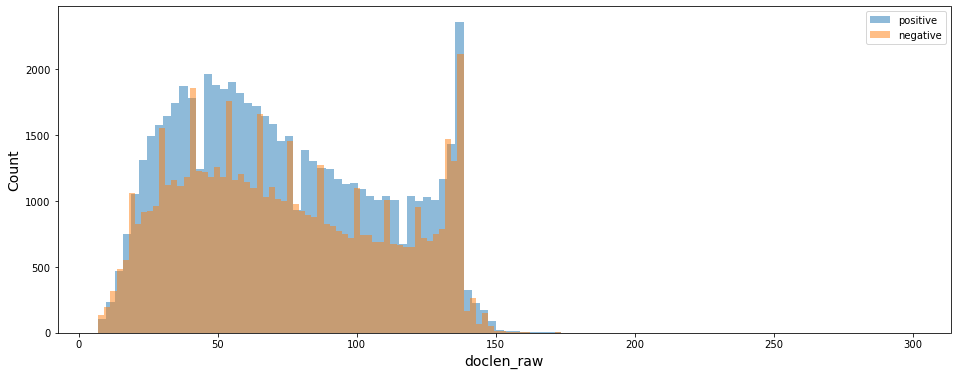

In [12]:
plot_target_hist(X_pos, X_neg, "doclen_raw")

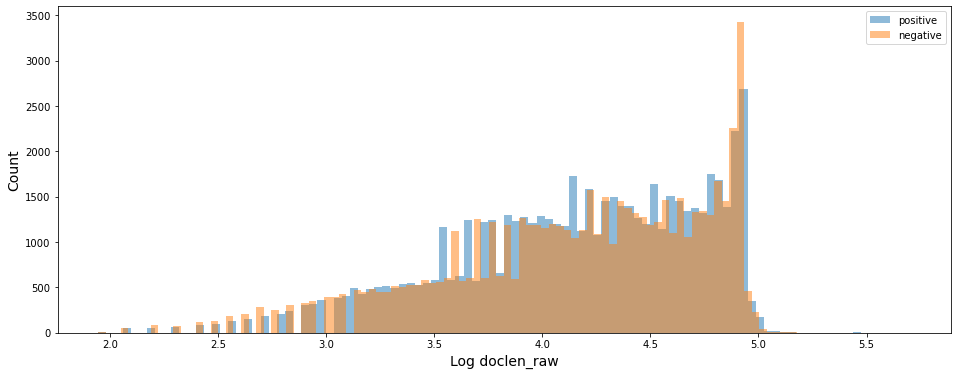

In [13]:
plot_target_hist(X_pos, X_neg, "doclen_raw", log_=True)

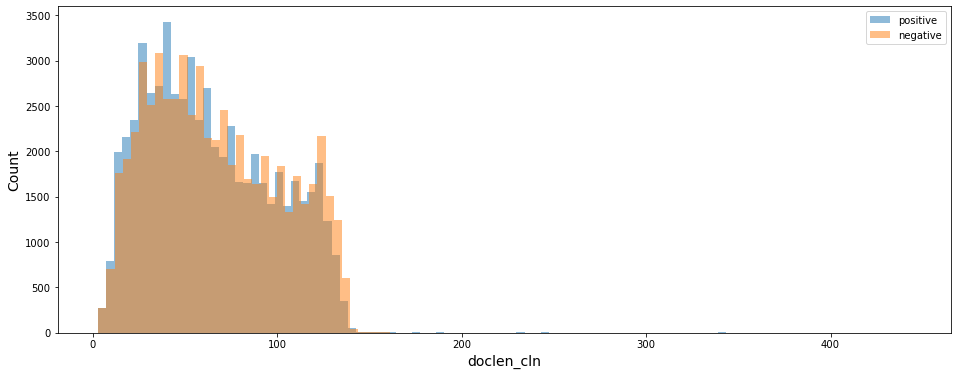

In [14]:
plot_target_hist(X_pos, X_neg, "doclen_cln")

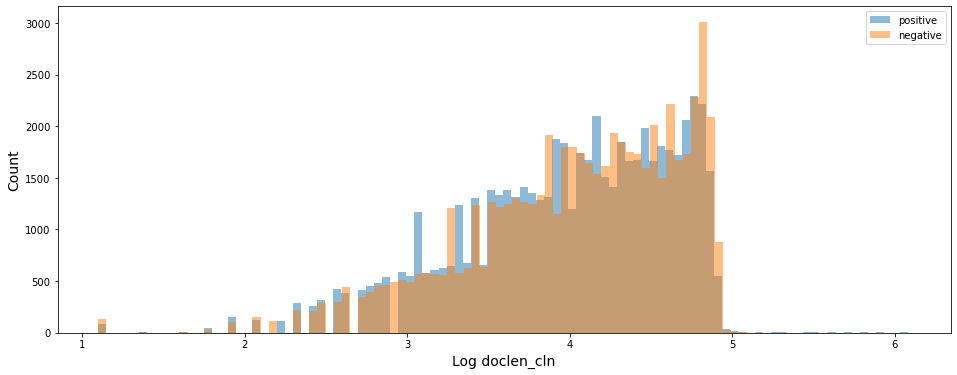

In [15]:
plot_target_hist(X_pos, X_neg, "doclen_cln", log_=True)

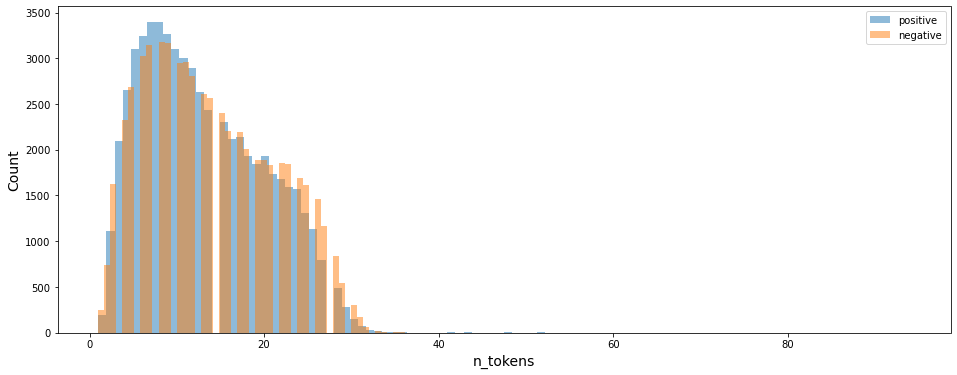

In [16]:
plot_target_hist(X_pos, X_neg, "n_tokens")

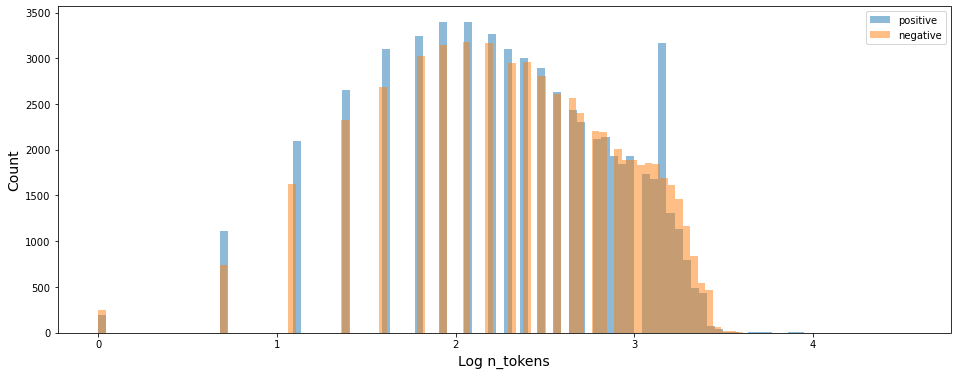

In [17]:
plot_target_hist(X_pos, X_neg, "n_tokens", log_=True)

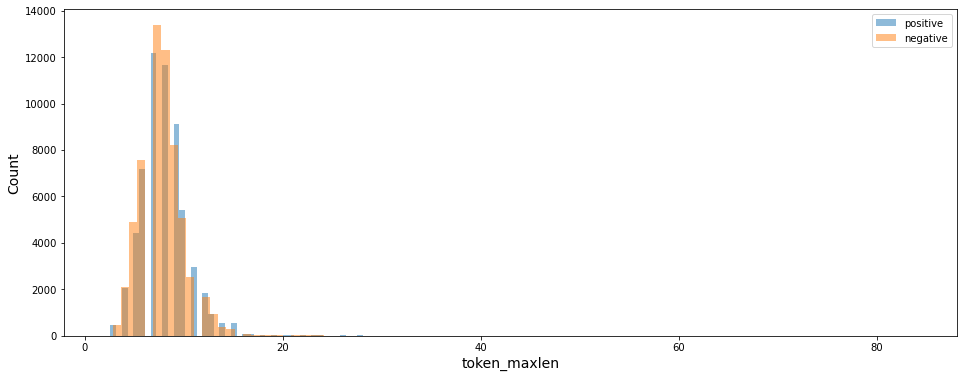

In [18]:
plot_target_hist(X_pos, X_neg, "token_maxlen")

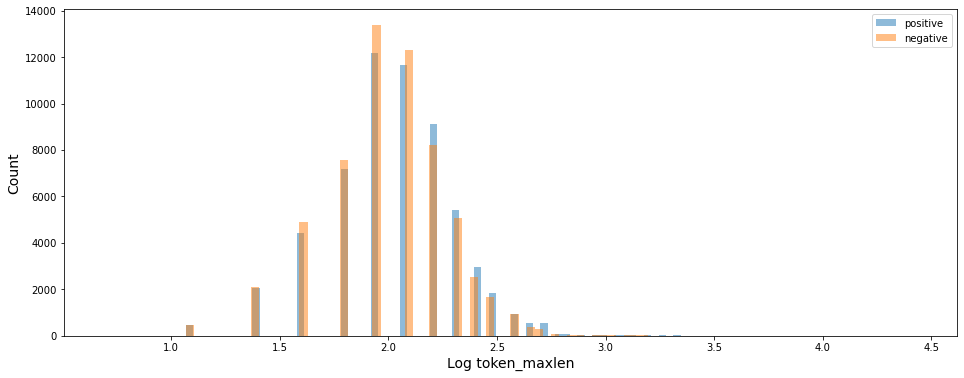

In [19]:
plot_target_hist(X_pos, X_neg, "token_maxlen", log_=True)

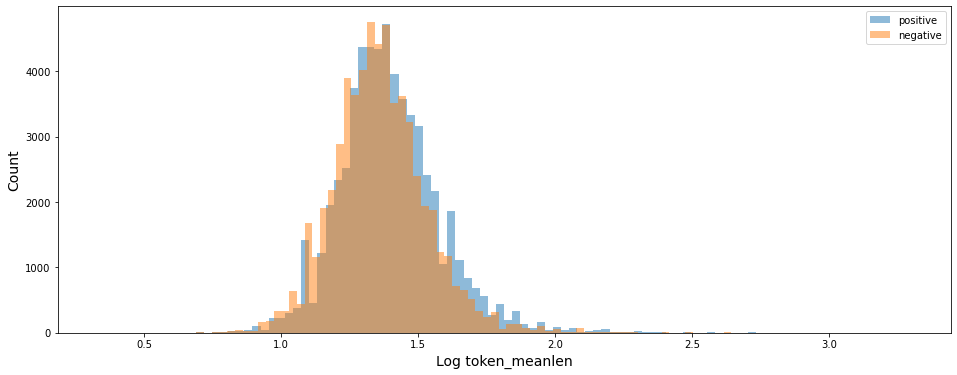

In [20]:
plot_target_hist(X_pos, X_neg, "token_meanlen", log_=True)

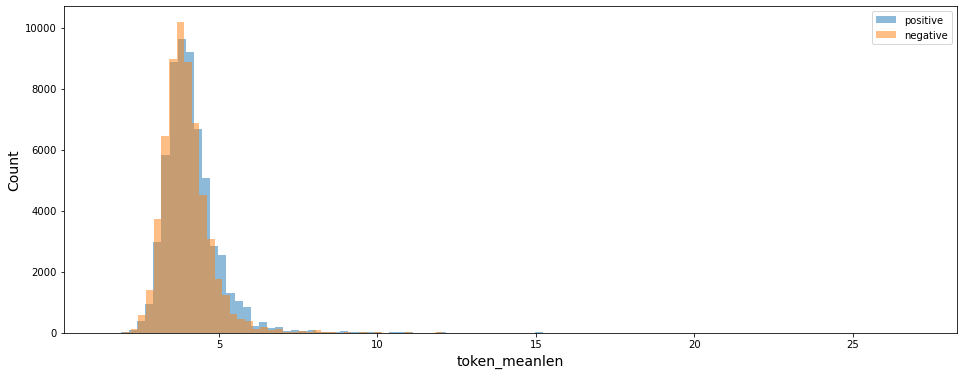

In [21]:
plot_target_hist(X_pos, X_neg, "token_meanlen")

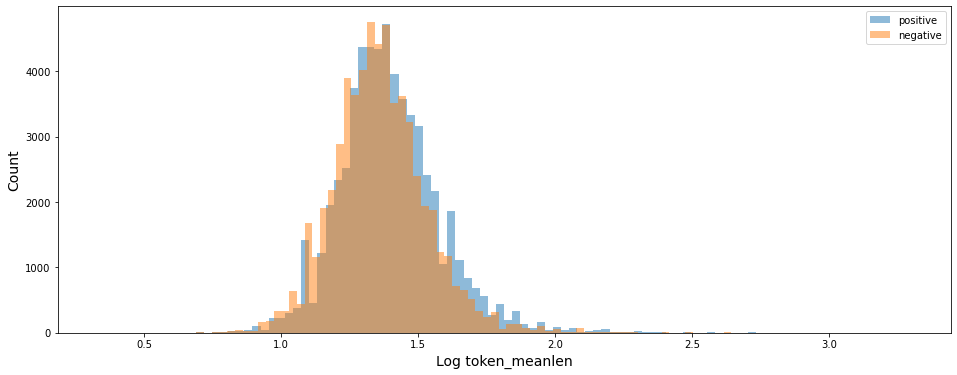

In [22]:
plot_target_hist(X_pos, X_neg, "token_meanlen", log_=True)

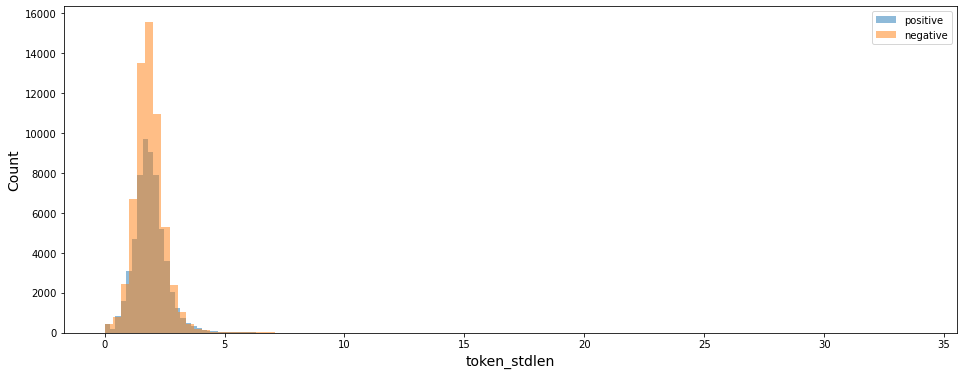

In [23]:
plot_target_hist(X_pos, X_neg, "token_stdlen")

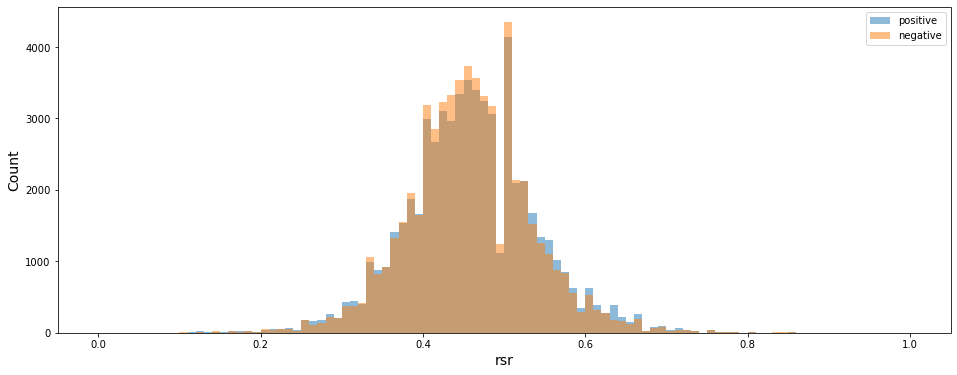

In [24]:
plot_target_hist(X_pos, X_neg, "rsr")

### Use ALL training data

Approx. 1.2 M rows.

In [25]:
# create arrays
X_array = np.array(X_train.iloc[:, 2]).ravel()
y_array = y_train.iloc[:,0].ravel()

In [26]:
start_time = time.time()

try:
    clean_docs, X_transformed = Fe.DocumentToFeaturesCounterTransformer().fit_transform(X_array)
except RuntimeWarning:
    pass

mins, secs = divmod(time.time() - start_time, 60)
print(f'Elapsed: {mins:0.0f} m {secs:0.0f} s')

Elapsed: 5 m 20 s


In [27]:
X_df = pd.DataFrame(X_transformed,
                    columns=["doclen_raw","doclen_cln",
                             "n_tokens","token_maxlen",
                             "token_meanlen","token_stdlen","rsr"])

X_df["target"] = y_array

In [28]:
X_df.describe()

,doclen_raw,doclen_cln,n_tokens,token_maxlen,token_meanlen,token_stdlen,rsr,target
count,1.197471e+06,1.197471e+06,1.197471e+06,1.197471e+06,1.197471e+06,1.197471e+06,1.197471e+06,1.197471e+06
mean,7.403239e+01,6.581338e+01,1.350384e+01,7.939986e+00,4.032041e+00,1.876406e+00,4.583757e-01,4.994768e-01
std,3.642950e+01,3.500287e+01,7.197427e+00,2.396892e+00,8.210894e-01,7.079410e-01,7.844546e-02,4.999999e-01
min,6.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,1.222200e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.400000e+01,3.700000e+01,8.000000e+00,7.000000e+00,3.535700e+00,1.487600e+00,4.107000e-01,0.000000e+00
50%,6.900000e+01,6.100000e+01,1.200000e+01,8.000000e+00,3.916700e+00,1.832500e+00,4.571000e-01,0.000000e+00
75%,1.040000e+02,9.300000e+01,1.900000e+01,9.000000e+00,4.375000e+00,2.204400e+00,5.000000e-01,1.000000e+00
max,3.740000e+02,5.830000e+02,1.190000e+02,1.170000e+02,6.300000e+01,5.500000e+01,1.000000e+00,1.000000e+00


In [29]:
# separate out positives and negatives for plotting
X_pos = X_df[X_df.target == 1]
X_neg = X_df[X_df.target == 0]

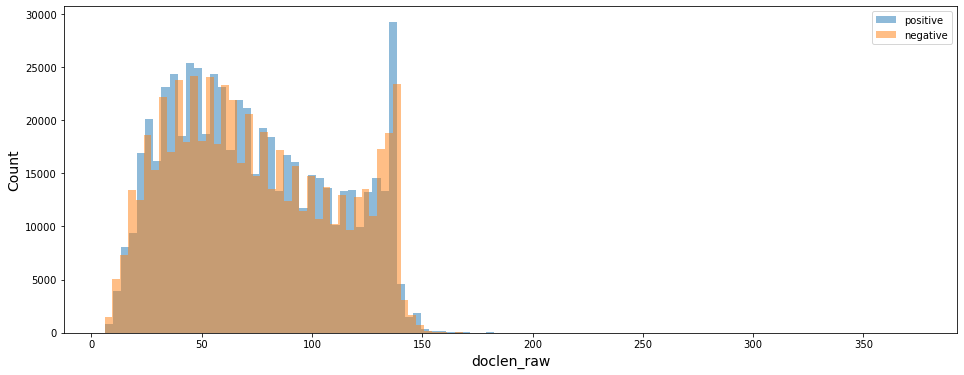

In [30]:
plot_target_hist(X_pos, X_neg, "doclen_raw")

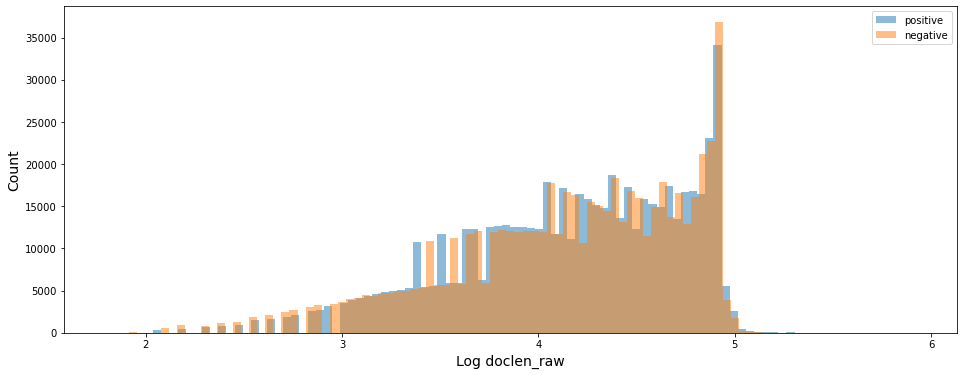

In [31]:
plot_target_hist(X_pos, X_neg, "doclen_raw", log_=True)

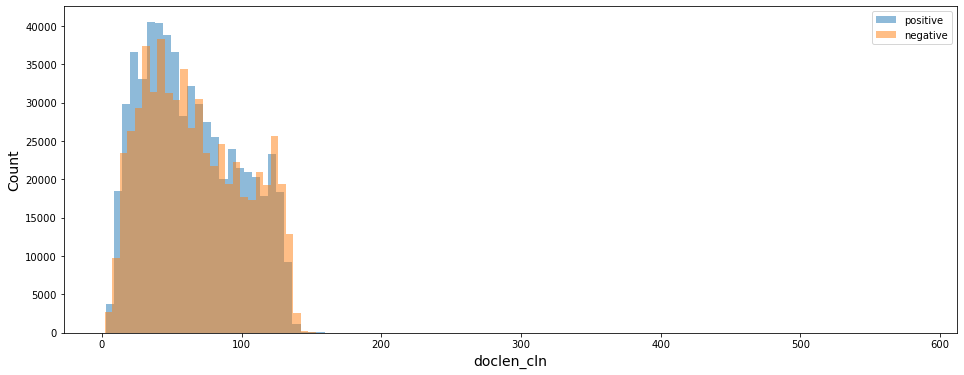

In [32]:
plot_target_hist(X_pos, X_neg, "doclen_cln")

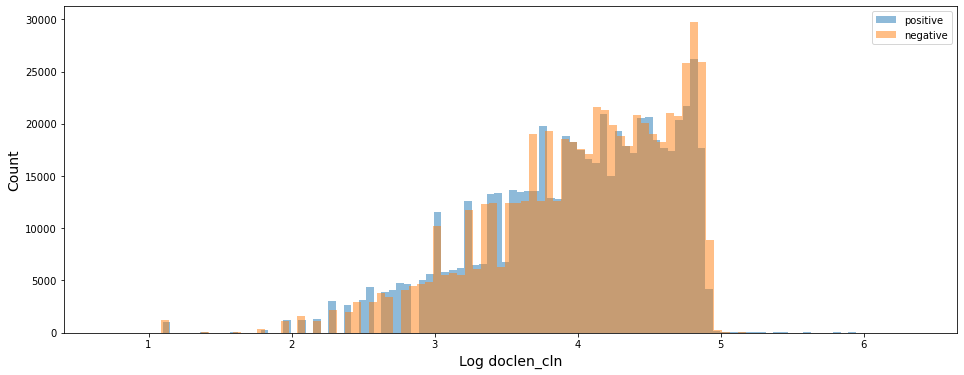

In [33]:
plot_target_hist(X_pos, X_neg, "doclen_cln", log_=True)

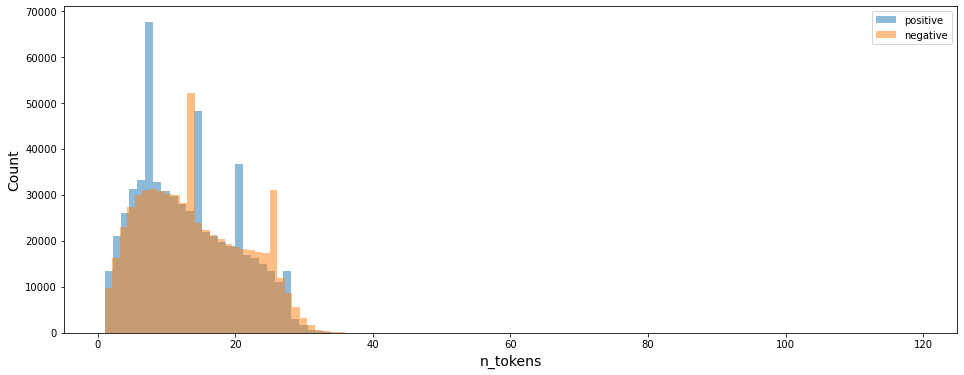

In [34]:
plot_target_hist(X_pos, X_neg, "n_tokens")

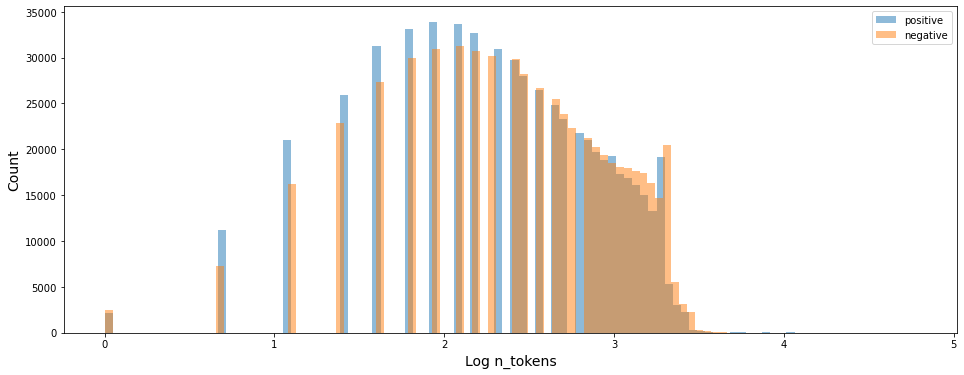

In [36]:
plot_target_hist(X_pos, X_neg, "n_tokens", log_=True)

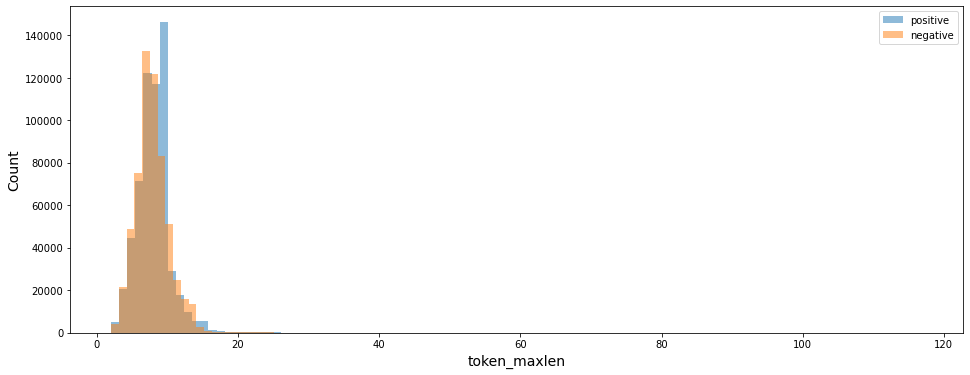

In [37]:
plot_target_hist(X_pos, X_neg, "token_maxlen")

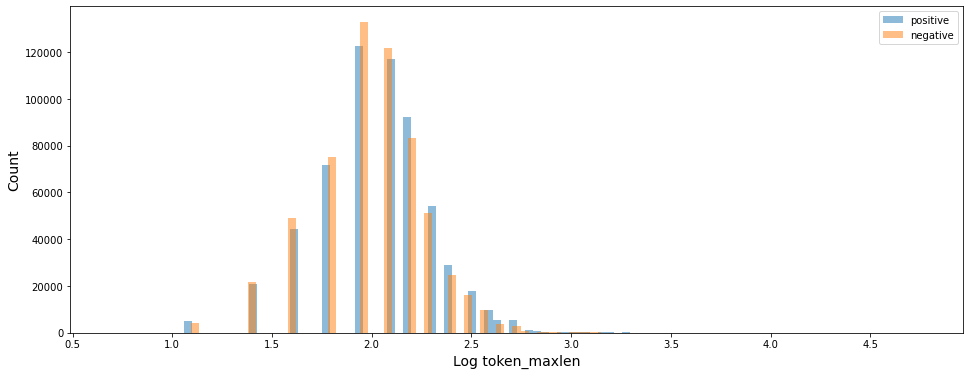

In [38]:
plot_target_hist(X_pos, X_neg, "token_maxlen", log_=True)

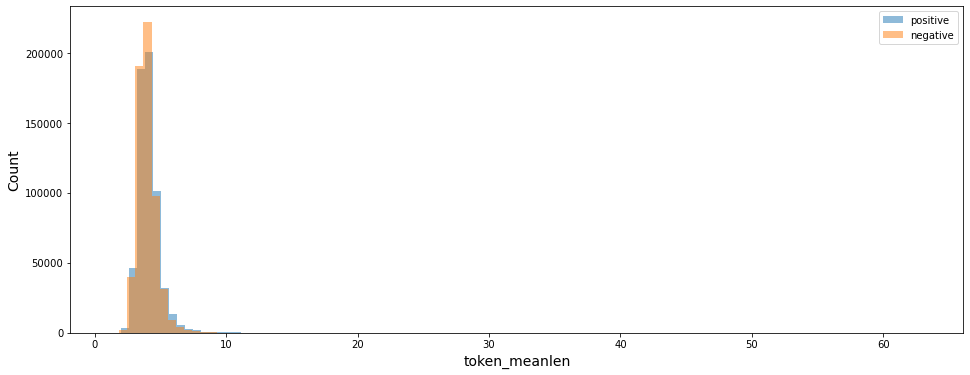

In [39]:
plot_target_hist(X_pos, X_neg, "token_meanlen")

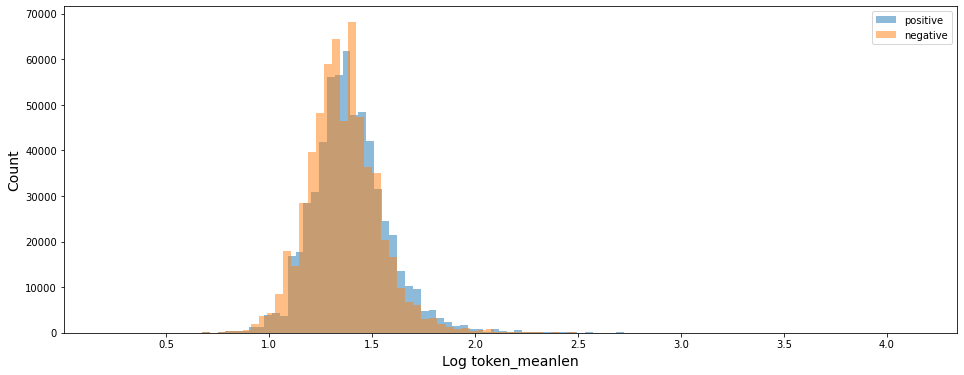

In [40]:
plot_target_hist(X_pos, X_neg, "token_meanlen", log_=True)

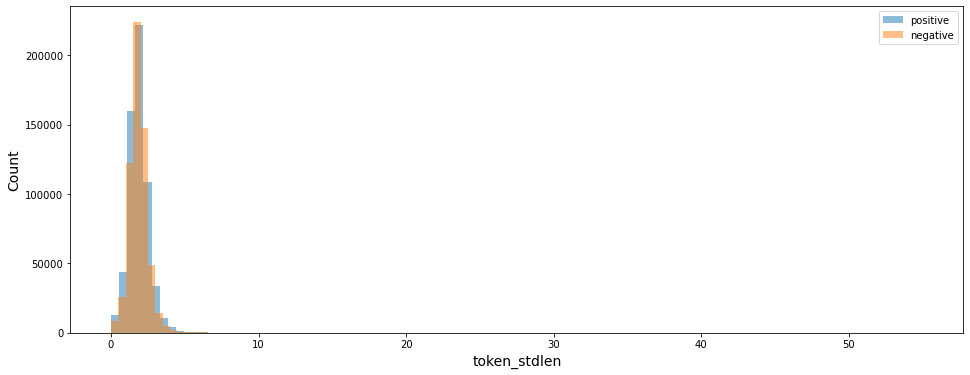

In [41]:
plot_target_hist(X_pos, X_neg, "token_stdlen")

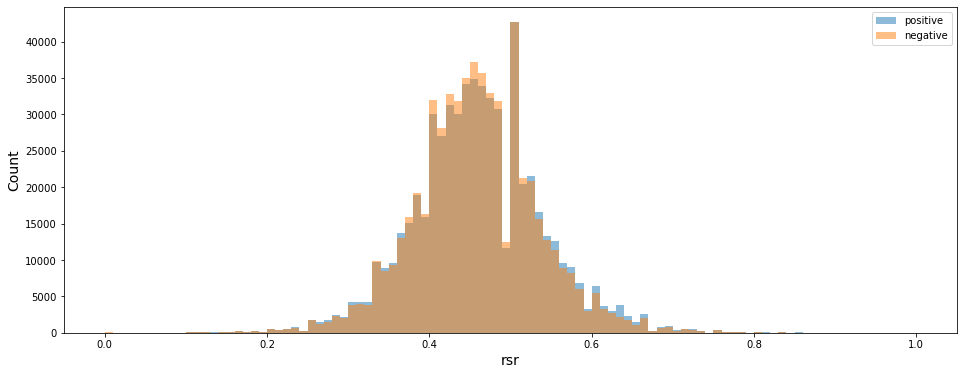

In [42]:
plot_target_hist(X_pos, X_neg, "rsr")

---